In [1]:
import numpy as np
import pandas as pd
import glob

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

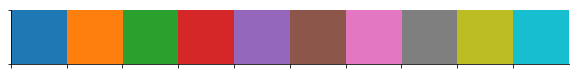

In [3]:
import seaborn as sns
sns.palplot(sns.color_palette())

In [4]:
green = sns.color_palette()[2]
red = sns.color_palette()[3]

# PG Bookshelves
We use PG bookshelves as labels, see here [here](http://www.gutenberg.org/wiki/Category:Bookshelf).
This notebook shows in which sense BS are better than subjects.
This notebook uses the bookshelves generated in the main `gutenberg` repo.
For a more self-contained, older version, see `notebooks/old/Bookshelves_generation.ipynb`.

### Statistics before filtering BS

In [6]:
import sys
sys.path.append("../../gutenberg-frozen-2018-07-18/src/")
from metaquery import meta_query
mq = meta_query(path="../../gutenberg-frozen-2018-07-18/metadata/metadata.csv", filter_exist=False)

## filtering germanm

In [7]:
mq.filter_lang('de',how='only')

In [8]:
mq.df

,id,title,author,authoryearofbirth,authoryearofdeath,language,downloads,subjects,type
2053,PG2054,Iphigenie auf Tauris,"Goethe, Johann Wolfgang von",1749.0,1832.0,['de'],60.0,{'Iphigenia (Mythological character) -- Drama'},Text
2145,PG2146,Egmont,"Goethe, Johann Wolfgang von",1749.0,1832.0,['de'],30.0,"{'Tragedies', 'Egmont, Lamoraal, Graaf van, 15...",Text
2173,PG2174,Frau und Kindern auf der Spur,"Rohner, Gerold K.",NaN,NaN,['de'],5.0,{'Western stories'},Text
2186,PG2187,Oberon,"Wieland, Christoph Martin",1733.0,1813.0,['de'],11.0,{'German poetry -- 18th century'},Text
2187,PG2188,Die Aufzeichnungen des Malte Laurids Brigge,"Rilke, Rainer Maria",1875.0,1926.0,['de'],75.0,"{'Stream of consciousness fiction', 'Paris (Fr...",Text
2188,PG2189,Der G'wissenswurm: Bauernkomödie in drei Akten,"Anzengruber, Ludwig",1839.0,1889.0,['de'],31.0,"{'Villages -- Drama', 'Comedies', 'Austrian dr...",Text
2189,PG2190,Isabella von Ägypten: Kaiser Karl des Fünften ...,"Arnim, Ludwig Achim, Freiherr von",1781.0,1831.0,['de'],13.0,"{'Charles V, Holy Roman Emperor, 1500-1558 -- ...",Text
2227,PG2228,Reineke Fuchs,"Goethe, Johann Wolfgang von",1749.0,1832.0,['de'],42.0,"{'German poetry -- 18th century', 'Epic poetry...",Text
2228,PG2229,Faust: Der Tragödie erster Teil,"Goethe, Johann Wolfgang von",1749.0,1832.0,['de'],571.0,"{'Magicians -- Drama', 'Legends -- Germany -- ...",Text
2229,PG2230,Faust: Der Tragödie zweiter Teil,"Goethe, Johann Wolfgang von",1749.0,1832.0,['de'],165.0,"{'Legends -- Germany -- Drama', 'Magicians -- ...",Text


## bookshelves

In [12]:
df = pd.read_pickle("../../gutenberg-frozen-2018-07-18/metadata/bookshelves.p")

In [13]:
df

,Spanish_American_War_(Bookshelf),Animals-Wild_(Bookshelf),The_Yellow_Book_(Bookshelf),Racism_(Bookshelf),Humor_(Bookshelf),The_Contemporary_Review_(Bookshelf),Boer_War_(Bookshelf),Judaism_(Bookshelf),Prairie_Farmer_(Bookshelf),Short_Stories_(Bookshelf)_Authors_A-E,...,Philosophy_(Bookshelf),Children's_Instructional_Books_(Bookshelf),Adventure_(Bookshelf),Medicine_(Bookshelf),Short_Stories_(Bookshelf),Children's_History_(Bookshelf),Mycology_(Bookshelf),Botany_(Bookshelf),School_Stories_(Bookshelf),Notes_and_Queries_(Bookshelf)
PG51379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG10144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG2526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG39481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG6804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
PG2789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG14941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG42546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG17935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PG5571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
list_pg_sel = mq.get_ids()
len(list_pg_sel)

1634

In [21]:
list_pg_b = list(df.index)
len(list_pg_b)

12521

In [22]:
list_sel = list( set(list_pg_b).intersection(set(list_pg_sel))  )
len(list_sel)

141

In [19]:
list_pg_b

Index(['PG51379', 'PG10144', 'PG2526', 'PG39481', 'PG6804', 'PG2789',
       'PG14941', 'PG42546', 'PG17935', 'PG5571',
       ...
       'PG32298', 'PG19076', 'PG47182', 'PG11210', 'PG35968', 'PG16469',
       'PG10540', 'PG15299', 'PG14542', 'PG13847'],
      dtype='object', length=12521)

In [17]:
df[list_pg_sel]

KeyError: "['PG2054' 'PG2146' 'PG2174' ... 'PG57131' 'PG57187' 'PG57240'] not in index"

In [14]:
# restrict to books we have
bookswehave = mq.df.id.values
new_idx = (np.intersect1d(df.index, bookswehave))
df = df.loc[new_idx]

In [15]:
# how many books and bs
df.shape

(0, 236)

In [ ]:
# how many books are part of how many bookshelves
Counter(df.sum(axis=1))

In [ ]:
x = np.array(list(list(zip(*sorted(list(Counter(df.sum(axis=1)).items()))))[1]))
x = x/np.sum(x)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2), tight_layout=True)
color = green

ax = ax2
ax.barh(range(3)[::-1], [x[0], x[1], np.sum(x[2:])], color=color)
ax.set_yticks(range(3))
ax.set_yticklabels(["in more than two", "in two bookshelves", "in one bookshelf"])
ax.set_xlabel("Percent of books")
ax.set_xlim(0, 1)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1][::2])
ax.set_xticklabels(["0%", "25%", "50%", "75%", "100%"][::2])
fig.savefig("../figures/bookshelves_per_book.pdf")

bs_sizes = df.sum().sort_values(ascending=False)

bs_sizes = bs_sizes.loc[bs_sizes>4]

ax = ax1
bins = np.linspace(0.6, 3.2, num=20)
ax.hist(np.log10(bs_sizes), bins=bins, color=color);
xticks = [5, 20, 100, 500]
ax.set_xticks([np.log10(x) for x in xticks])
ax.set_xticklabels(xticks)
ax.set_xlabel("Number of books\nper bookshelf")
ax.set_ylabel("Number of\nbookshelves")
fig.savefig("../figures/stats_bookshelf.pdf")

In [ ]:
list_subjects = [[k for k in h.strip("{}")[1:-1].replace("', '","_").split('_')] for h in mq.df['subjects'].replace('set()',np.nan).dropna()]

In [ ]:
subjects_per_book = mq.df['subjects'].replace('set()',np.nan).dropna().apply(lambda x:len([k for k in x.strip("{}")[1:-1].replace("', '","_").split('_')])).values
books_per_subject = list(mq.get_subjects_counts().values())

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2), tight_layout=True)
color = red
bins = np.linspace(0.6, 3.2, num=20)

ax = ax1
ax.hist(np.log10(books_per_subject), bins=bins, color=color);
xticks = [5, 20, 100, 500]
ax.set_xticks([np.log10(x) for x in xticks])
ax.set_xticklabels(xticks)
ax.set_xlabel("Number of books\nper subject")
ax.set_ylabel("Number of\nsubjects")
fig.savefig("../figures/books_per_subject.pdf")

x = np.array(list(list(zip(*sorted(list(Counter(subjects_per_book).items()))))[1]))
x = x/np.sum(x)
ax = ax2
ax.barh(range(3)[::-1], [x[0], x[1], np.sum(x[2:])], color=red)
ax.set_yticks(range(3))
ax.set_yticklabels(["in more than two", "in two subjects", "in one subject"])
ax.set_xlabel("Percent of books",)
ax.set_xlim(0, 1)
ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(["0%", "50%",  "100%"])
fig.savefig("../figures/stats_subjects.pdf")